In [1]:
%matplotlib inline
import pandas as pd

# Cosine similarity

I'll draw a picture of cosine similarity in class, but it basically means **hey, do these things look the same?**

Here are some people. They own animals. This example is terrible.

In [2]:
pet_owners = [
    { 'name': 'Matty', 'cats': 7, 'dogs': 22, 'mice': 0 },
    { 'name': 'Margo', 'cats': 12, 'dogs': 9, 'mice': 5 },
    { 'name': 'Marby', 'cats': 9, 'dogs': 5, 'mice': 2 },
    { 'name': 'Maaaa', 'cats': 1, 'dogs': 2, 'mice': 1 },
    { 'name': 'Mappi', 'cats': 5, 'dogs': 9, 'mice': 5 },
    { 'name': 'Maesa', 'cats': 10, 'dogs': 1, 'mice': 0 },
    { 'name': 'Mazda', 'cats': 2, 'dogs': 3, 'mice': 0 }
]

df = pd.DataFrame(pet_owners)
df

,cats,dogs,mice,name
0,7,22,0,Matty
1,12,9,5,Margo
2,9,5,2,Marby
3,1,2,1,Maaaa
4,5,9,5,Mappi
5,10,1,0,Maesa
6,2,3,0,Mazda


Let's compare them based on the number of animals they have. So those animal counts will be our **features.**

In [14]:
features_df = df[['cats','dogs','mice']]
features_df

,cats,dogs,mice
0,7,22,0
1,12,9,5
2,9,5,2
3,1,2,1
4,5,9,5
5,10,1,0
6,2,3,0


And we'll save everyone's name into a list called **names**.

In [15]:
names = df.name
names

0    Matty
1    Margo
2    Marby
3    Maaaa
4    Mappi
5    Maesa
6    Mazda
Name: name, dtype: object

Scikit-learn has a lot of [pairwise metrics](http://scikit-learn.org/stable/modules/metrics.html#metrics) you can use to see how related things are. Y'know, like how we spend time clustering things, this is kind of the step in-between that you don't get to see.

You can use other metrics, but cosine similarity is a pretty good/safe/reasonably understandable one.

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Use cosine_similarity to create a matrix of... similarities
# call it similarity

Looks fun, right? In that big matrix,**every column is a person and every row is a person**, and the intersection is how similar they are. If we want to see it a little more nicely...

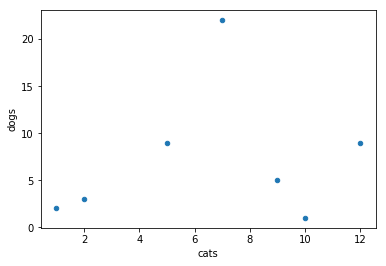

In [17]:
df.plot(x='cats', y='dogs', kind='scatter')

In [20]:
# Turn it into a dataframe with an index and columns that make sense
# call it similarity_df

similarity = cosine_similarity(features_df)
similarity_df=pd.DataFrame(similarity, columns=names, index=names)

Everyone is 100% similar to themselves - `1.0` - but for everyone else it gets closer and closer to `0` if they're less related.

So, now that we've made a nice dataframe with nice rows and columns, who is Matty most similar to?

In [24]:
similarity_df['Matty'].sort_values(ascending=False)

name
Matty    1.000000
Mazda    0.961069
Maaaa    0.901843
Mappi    0.881773
Margo    0.772530
Marby    0.714474
Maesa    0.396519
Name: Matty, dtype: float64

Let's visualize this while we're at it! We're going to use seaborn because it's so easy.

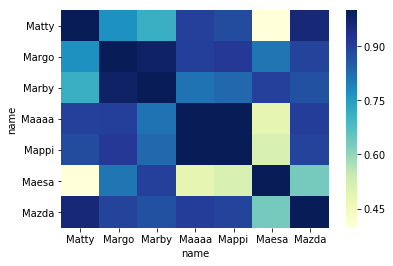

In [21]:
%matplotlib inline
import seaborn as sns

# cmap makes the colors better. The default one is pretty ugly.
ax = sns.heatmap(similarity_df, cmap="YlGnBu")

# Well, sure, okay. Let's try it with real data.

In [25]:
import glob

filenames = glob.glob("books/*/*.txt")
contents = [open(filename).read() for filename in filenames]
df = pd.DataFrame({
    'filename': filenames,
    'content': contents
})
df.head()

,content,filename
0,"The Project Gutenberg EBook of Emma, by Jane A...",books/austen/emma.txt
1,"The Project Gutenberg EBook of Mansfield Park,...",books/austen/mansfield_park.txt
2,The Project Gutenberg EBook of Northanger Abbe...,books/austen/northanger_abbey.txt
3,The Project Gutenberg EBook of Pride and Preju...,books/austen/pride-and-prejudice.txt
4,The Project Gutenberg EBook of Sense and Sensi...,books/austen/sense-and-sensibility.txt


In [26]:
df['author'] = df.filename.str.extract("books/(.*)/", expand=False)
df['title'] = df.filename.str.extract("books/.*/(.*).txt", expand=False)
df.head()

,content,filename,author,title
0,"The Project Gutenberg EBook of Emma, by Jane A...",books/austen/emma.txt,austen,emma
1,"The Project Gutenberg EBook of Mansfield Park,...",books/austen/mansfield_park.txt,austen,mansfield_park
2,The Project Gutenberg EBook of Northanger Abbe...,books/austen/northanger_abbey.txt,austen,northanger_abbey
3,The Project Gutenberg EBook of Pride and Preju...,books/austen/pride-and-prejudice.txt,austen,pride-and-prejudice
4,The Project Gutenberg EBook of Sense and Sensi...,books/austen/sense-and-sensibility.txt,austen,sense-and-sensibility


### What words do those books use?

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
matrix = vec.fit_transform(df.content)
features_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names(), index=df.title)
features_df

,000,007,05,10,100,1000,1001,1002,10022,1003,...,óinand,óinto,ómaryo,ónen,óre,únótime,únótimë,úre,úrimë,úrui
title,,,,,,,,,,,,,,,,,,,,,
emma,0.001030,0.000000,0.00000,0.000511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mansfield_park,0.000779,0.000000,0.00000,0.000869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
northanger_abbey,0.000868,0.000000,0.00000,0.000645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pride-and-prejudice,0.000499,0.000000,0.00000,0.000371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sense-and-sensibility,0.000468,0.000000,0.00000,0.000348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1913,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1914,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1915,0.120092,0.000000,0.00000,0.019133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1916,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### How similar are they? We could cluster, but instead...

In [46]:
similarity = cosine_similarity(features_df)
similarity_df = pd.DataFrame(similarity, index=df.title, columns=df.title)

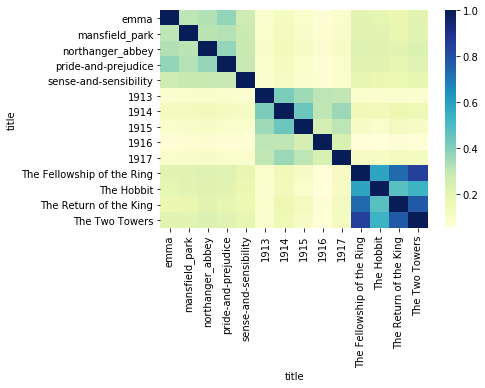

In [47]:
sns.heatmap(similarity_df, cmap="YlGnBu")

## Let's try it without stopwords to compare

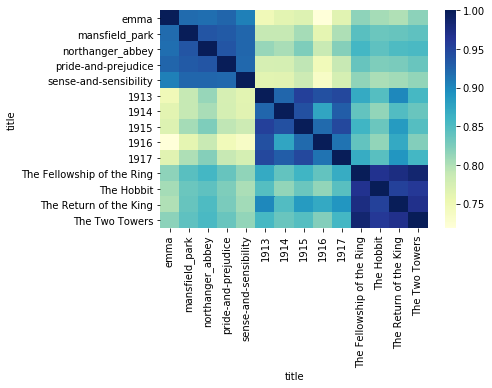

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
matrix = vec.fit_transform(df.content)
similarity = cosine_similarity(matrix)
similarity_df = pd.DataFrame(similarity, index=df.title, columns=df.title)
sns.heatmap(similarity_df, cmap="YlGnBu")

Hmm, interesting: **why does it change so much?**

## Is Pride and Prejudice more like State of the Union addresses or JRR Tolkein?

In [45]:
similarity_df['pride-and-prejudice'].sort_values(ascending=False)

title
pride-and-prejudice           1.000000
northanger_abbey              0.936519
mansfield_park                0.932818
emma                          0.924443
sense-and-sensibility         0.922823
The Fellowship of the Ring    0.837777
The Two Towers                0.837151
The Return of the King        0.827381
The Hobbit                    0.825131
1915                          0.792910
1917                          0.788097
1914                          0.776032
1913                          0.775510
1916                          0.746305
Name: pride-and-prejudice, dtype: float64